In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import numpy as np
pd.set_option('max_columns', 50)

In [2]:
rent = pd.read_csv("rent_clean.csv")
rent.head()

,Unnamed: 0,Zone,Rent,Area,Yearly rent,Number of bedrooms
0,0,1,564.0,56.0,6768.0,1
1,1,1,700.0,61.0,8400.0,1
2,2,1,1080.0,113.0,12960.0,3+
3,3,1,1131.0,127.0,13572.0,3+
4,4,1,420.0,27.0,5040.0,Studio


In [3]:
rent.drop(columns="Unnamed: 0",inplace=True)

In [4]:
rent.rename(columns = {"Number of bedrooms":"bedrooms"},inplace=True)
rent

,Zone,Rent,Area,Yearly rent,bedrooms
0,1,564.0,56.0,6768.0,1
1,1,700.0,61.0,8400.0,1
2,1,1080.0,113.0,12960.0,3+
3,1,1131.0,127.0,13572.0,3+
4,1,420.0,27.0,5040.0,Studio
...,...,...,...,...,...
899,6,550.0,67.0,6600.0,2
900,6,547.0,60.0,6564.0,1
901,6,517.0,49.0,6204.0,1
902,6,561.0,55.0,6732.0,1


In [5]:
airbnb = pd.read_csv("airbnb_final.csv")
airbnb.drop(columns="Unnamed: 0",inplace=True)
airbnb.head(5)

,id,host_id,room_type,bedrooms,price,count of reviews,days of occupancy,Yearly income,Zone,latitude,longitude,geometry
0,317273,1156398,Entire home/apt,1,155,7,42,6510,1,44.84734,-0.58034,POINT (-0.58034 44.84734)
1,317658,1156398,Entire home/apt,2,195,18,108,21060,1,44.83815,-0.56989,POINT (-0.56989 44.83815)
2,333031,1697156,Entire home/apt,Studio,79,32,192,15168,1,44.84267,-0.57656,POINT (-0.5765600000000001 44.84267)
3,365993,1847986,Entire home/apt,2,85,9,54,4590,5,44.81267,-0.55762,POINT (-0.55762 44.81267)
4,400306,1998044,Entire home/apt,1,60,8,48,2880,3,44.84390,-0.55831,POINT (-0.5583100000000001 44.8439)


Let's plot the distribution of revenues for each zone

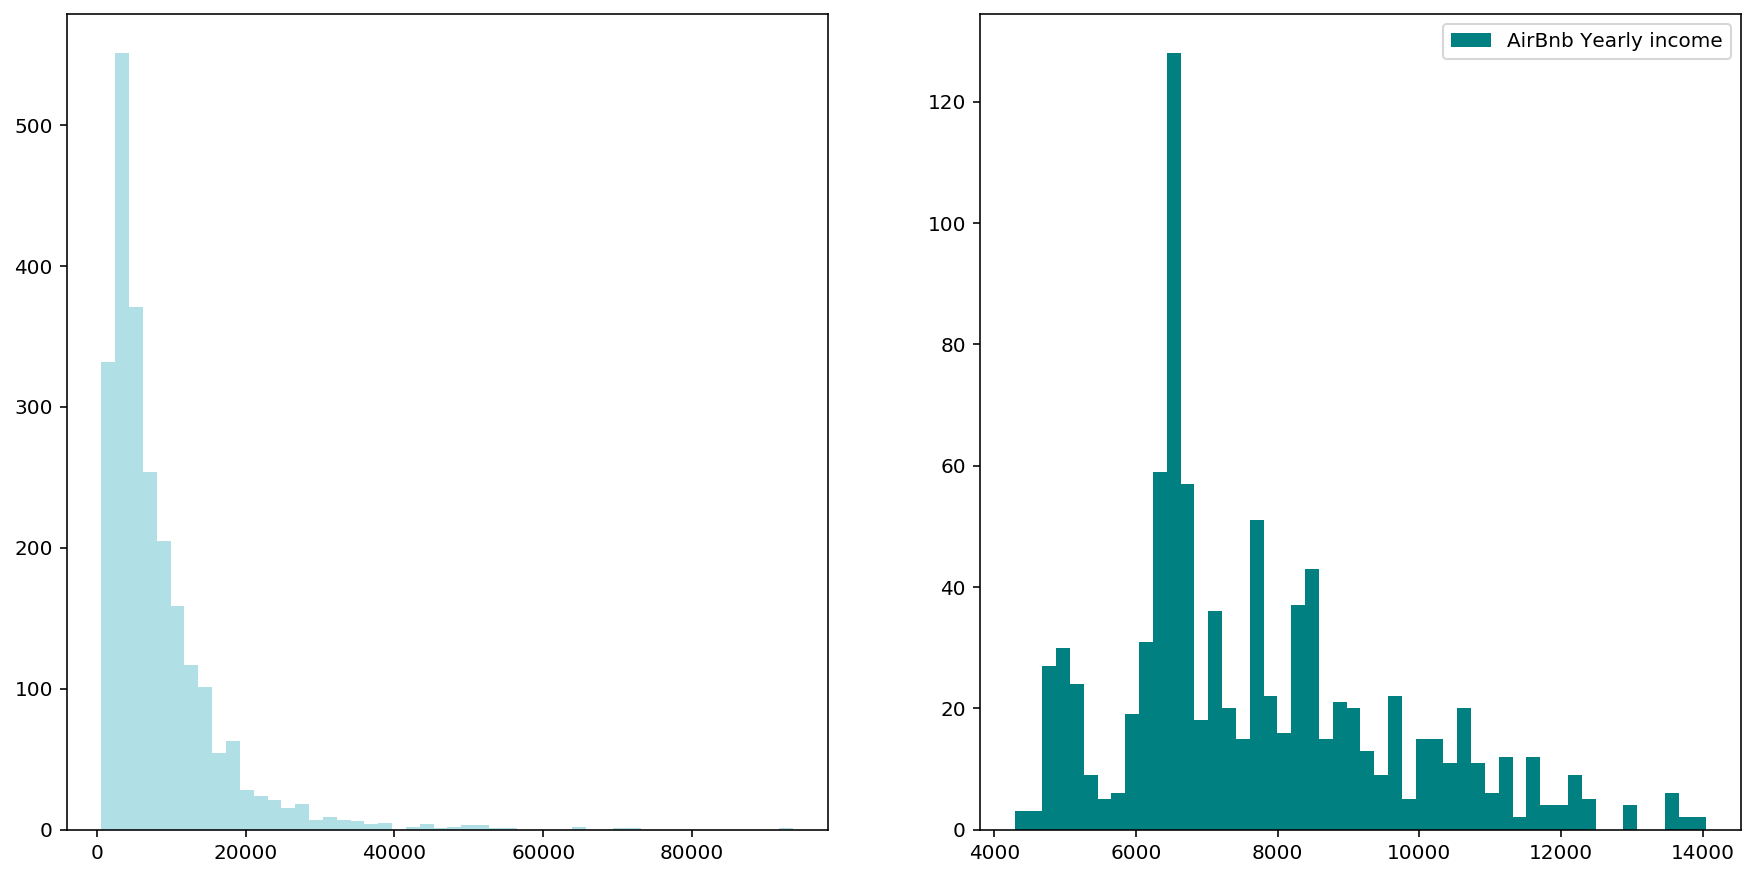

In [49]:

a=airbnb["Yearly income"]
r=rent["Yearly rent"]


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))

axs[0].hist(a, linestyle='-', color = 'powderblue',bins=50)
axs[1].hist(r, linestyle='-', color = 'teal',bins=50)
labels = ["AirBnb Yearly income","Rent Yearly income"]
plt.legend(labels)
plt.show()

In [9]:

test = pd.concat([airbnb, rent], sort=False)
test.head(5)
#test.to_csv("C:/Users/tvpia/Desktop/PROJECT 6/Project-Week-6/your-project/concatted.csv")

,id,host_id,room_type,bedrooms,price,count of reviews,days of occupancy,Yearly income,Zone,latitude,longitude,geometry,Rent,Area,Yearly rent
0,317273.0,1156398.0,Entire home/apt,1,155.0,7.0,42.0,6510.0,1,44.84734,-0.58034,POINT (-0.58034 44.84734),NaN,NaN,NaN
1,317658.0,1156398.0,Entire home/apt,2,195.0,18.0,108.0,21060.0,1,44.83815,-0.56989,POINT (-0.56989 44.83815),NaN,NaN,NaN
2,333031.0,1697156.0,Entire home/apt,Studio,79.0,32.0,192.0,15168.0,1,44.84267,-0.57656,POINT (-0.5765600000000001 44.84267),NaN,NaN,NaN
3,365993.0,1847986.0,Entire home/apt,2,85.0,9.0,54.0,4590.0,5,44.81267,-0.55762,POINT (-0.55762 44.81267),NaN,NaN,NaN
4,400306.0,1998044.0,Entire home/apt,1,60.0,8.0,48.0,2880.0,3,44.84390,-0.55831,POINT (-0.5583100000000001 44.8439),NaN,NaN,NaN


In [23]:
test.pivot_table(index="Zone",values=["Yearly income","Yearly rent"],columns="bedrooms",aggfunc={'mean','median','std','count'})

Yearly income                                            \
                 count                        mean                 
bedrooms             1   2  3+ Studio            1             2   
Zone                                                               
1                  322  95  59     63  7871.155280  13771.200000   
2                  317  75  56     62  7753.621451  11246.373333   
3                  233  59  36     34  6138.772532   8379.220339   
4                  179  64  30     28  5680.569832   9464.625000   
5                  265  66  50     42  5463.788679   7959.151515   
6                  160  35  24     19  4957.962500   6999.657143   

                                                                       \
                                     median                             
bedrooms            3+       Studio       1        2       3+  Studio   
Zone                                                                    
1         21790.949153  8068.158730  6267.0  10560.0  16800.0  6120.0   
2         18026.821429  6861.161290  5700.0   9240.0  14460.0  5274.0   
3         14526.388889  6247.764706  4864.0   6300.0  10290.0  4050.0   
4         14421.266667  5361.071429  4386.0   6870.0  11475.0  3762.0   
5         14483.240000  6769.857143  3960.0   5940.0  10392.0  5691.0   
6         12529.750000  6685.368421  3579.0   6240.0   7776.0  5244.0   

                                                              Yearly rent      \
                  std                                               count       
bedrooms            1            2            3+       Studio           1   2   
Zone                                                                            
1         5937.123674  9415.320487  17381.927635  5915.828165          76  24   
2         6944.221591  7802.711585  12943.034523  4474.507722          77  24   
3         4087.513871  5278.861594  14663.787278  5087.069497          76  26   
4         4468.888257  7712.538601  10526.338663  4192.378004          74  34   
5         4268.046344  5388.379417  11208.822144  4191.232391          57  45   
6         4533.733755  4384.169101  11528.329391  4510.856388          44  53   

                                                                          \
                            mean                                           
bedrooms  3+ Studio            1            2            3+       Studio   
Zone                                                                       
1         24     18  6766.736842  8921.500000  12589.000000  5018.000000   
2         24     18  6688.519481  8461.000000  10912.000000  5290.000000   
3         26     21  6652.263158  8401.384615  10888.615385  4731.428571   
4         27     15  6797.513514  8486.117647  10951.111111  5052.800000   
5         38     14  6664.000000  8140.800000  10433.368421  4972.285714   
6         59     10  6451.090909  7741.811321   9447.661017  4858.800000   

                                                                   \
          median                                  std               
bedrooms       1       2       3+  Studio           1           2   
Zone                                                                
1         6630.0  8928.0  12960.0  5040.0  568.665229  419.559707   
2         6600.0  8400.0  10692.0  5340.0  494.546832  466.222936   
3         6564.0  8364.0  11178.0  4800.0  458.626976  300.993432   
4         6600.0  8436.0  10800.0  5064.0  774.703253  637.788022   
5         6480.0  8280.0  10500.0  4968.0  611.862730  495.218299   
6         6360.0  7800.0   9600.0  4800.0  547.016849  409.932502   

                                   
                                   
bedrooms           3+      Studio  
Zone                               
1         1334.063814  128.997948  
2          550.724424  187.185972  
3         1056.954534  241.827329  
4         1006.725894   70.039989  
5          699.328652   77.570245  
6         

#### The investors are curious as to which  

In [11]:
piv_summ =test.pivot_table(index="Zone",values=["Yearly income","Yearly rent"],
                           aggfunc={"Yearly income":'mean',"Yearly rent":'mean'}).rename(columns = {"Yearly income":'AirBnb',"Yearly rent":'Rented Appartments'})
piv_summ

,AirBnb,Rented Appartments
Zone,,
1,10457.766234,7893.295775
2,9286.803922,7518.797203
3,7348.292818,7425.986577
4,7326.598007,7753.440000
5,7048.945626,7871.844156
6,6159.655462,7832.313253


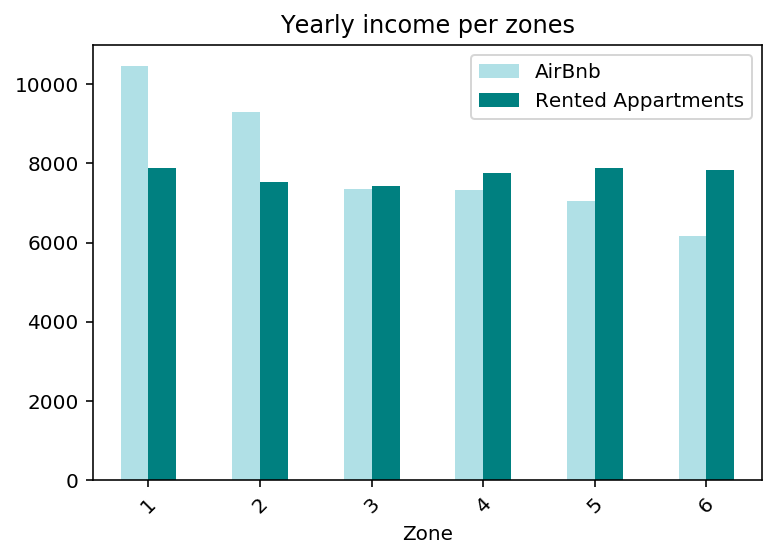

In [12]:
piv_summ.plot.bar(color = ['powderblue', 'teal'])
plt.xticks(rotation = 45)
plt.title('Yearly income per zones')
plt.show()

In [55]:
piv_summa =test.pivot_table(index="bedrooms",values=["Yearly income","Yearly rent"],aggfunc={"Yearly income":'mean',"Yearly rent":'mean'}).rename(columns={"Yearly income":"Yearly Airbnb (€)"})
piv_summa = piv_summa.reindex(["Studio", "1", "2","3+"]).round()
piv_summa

,Yearly Airbnb (€),Yearly rent
bedrooms,,
Studio,6885.0,4988.0
1,6559.0,6687.0
2,10208.0,8256.0
3+,16767.0,10589.0


In [18]:
cor_zo = piv_summ.reset_index()
cor_zo.corr()

,Zone,AirBnb,Rented Appartments
Zone,1.000000,-0.941379,0.293794
AirBnb,-0.941379,1.000000,-0.010470
Rented Appartments,0.293794,-0.010470,1.000000


In [13]:
test.Zone.value_counts()

1    681
2    653
5    577
3    511
4    451
6    404
Name: Zone, dtype: int64

In [14]:
test.bedrooms.value_counts()

1         1880
2          600
3+         453
Studio     344
Name: bedrooms, dtype: int64